$ \large\textbf{Exercise 1.}$



Recall that to solve problems of the form $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$, the update rule involved in Newton's method is of the form: 
\begin{align}
\mathbf{x}^{k+1} = \mathbf{x}^{k} - \eta^k (\nabla^2 f(\mathbf{x}^{k}))^{-1} \nabla f(\mathbf{x}^{k}).   
\end{align}

Now we will discuss a method which avoids explicit computation of the inverse of Hessian matrix at each iteration, but is nearly efficient as the Newton's method. This method will be called BFGS named after the famous applied Mathematicians Broyden, Fletcher, Goldfarb and Shanno. 

The main idea of BFGS method is to replace the inverse of Hessian matrix $(\nabla^2 f(\mathbf{x}^{k}))^{-1}$ in the update rule of Newton's method with a surrogate term $B^k$. 

Therefore the update rule of BFGS looks as follows:
\begin{align}
\mathbf{x}^{k+1} = \mathbf{x}^{k} - \eta^k B^k \nabla f(\mathbf{x}^{k})   
\end{align}
where $B^k$ is a surrogate for the inverse of Hessian matrix. 

To find a suitable candidate for $B^k$, we need to consider some favorable characteristics expected from $B^k$: 

\begin{align}
&B^k \text{ is symmetric positive definite}.  \\
&B^k \text{ does not involve computing Hessian or its inverse and should be computable only from the gradients}.  \\
&\text{Replacing  } (\nabla^2 f(\mathbf{x}^{k}))^{-1} \text{ with } B^k \text{ should not slow down the algorithm too much}. \\ 
\end{align}




To design a suitable $B^k$ we shall consider the quadratic approximation of $f$:

\begin{align}
\tilde{f}(\mathbf{x}) = f(\mathbf{x}^{k+1}) + \left \langle \nabla f(\mathbf{x}^{k+1}), \mathbf{x}-\mathbf{x}^{k+1}\right \rangle  + \frac{1}{2} (\mathbf{x}-\mathbf{x}^{k+1})^\top H^{k+1} (\mathbf{x}-\mathbf{x}^{k+1}). 
\end{align}
where $H^{k+1} = \nabla^2 f({\mathbf{x}}^{k+1})$.

Note that using this quadratic approximation we have the gradient as:
\begin{align}
\nabla \tilde{f}(\mathbf{x}) = \nabla f(\mathbf{x}^{k+1}) + H^{k+1}(\mathbf{x}-\mathbf{x}^{k+1}). 
\end{align}

In order to assume $\tilde{f}$ to behave similar to $f$, we expect the following. 

By plugging in $\mathbf{x} = \mathbf{x}^k$ and $\mathbf{x}=\mathbf{x}^{k+1}$, we expect the following from the previous gradient equation:
\begin{align}
\nabla \tilde{f} (\mathbf{x}^k) = \nabla f(\mathbf{x}^k) \text{ and }\\ 
\nabla \tilde{f} (\mathbf{x}^{k+1}) = \nabla f(\mathbf{x}^{k+1}). 
\end{align}

The relation $\nabla \tilde{f} (\mathbf{x}^{k+1}) = \nabla f(\mathbf{x}^{k+1})$ directly follows from the gradient relation  $\nabla \tilde{f}(\mathbf{x}) = \nabla f(\mathbf{x}^{k+1}) + H^{k+1}(\mathbf{x}-\mathbf{x}^{k+1})$.

For the gradient relation to satisfy $\nabla \tilde{f} (\mathbf{x}^k) = \nabla f(\mathbf{x}^k)$ we need:
\begin{align}
\nabla \tilde{f} (\mathbf{x}^k) &= \nabla f(\mathbf{x}^{k+1}) + H^{k+1}(\mathbf{x}^{k}-\mathbf{x}^{k+1}) = \nabla f(\mathbf{x}^k) \\
\implies H^{k+1}(\mathbf{x}^{k}-\mathbf{x}^{k+1}) &= (\nabla f(\mathbf{x}^{k})- \nabla {f} (\mathbf{x}^{k+1})) \\
\implies H^{k+1}(\mathbf{x}^{k+1}-\mathbf{x}^{k}) &= (\nabla f(\mathbf{x}^{k+1})- \nabla {f} (\mathbf{x}^k)).
\end{align}
This previous equality is called the $\textbf{secant equation}$. 

From the secant equation we see that inverse of $H^{k+1}$ operates on the difference of gradients $(\nabla f(\mathbf{x}^{k+1})- \nabla {f} (\mathbf{x}^k))$  to yield the difference of iterates $(\mathbf{x}^{k+1}-\mathbf{x}^{k})$. 

The secant equation can be equivalently and compactly written as:
\begin{align}
(H^{k+1})^{-1} \mathbf{y}^k = \mathbf{s}^k. 
\end{align}
where $\mathbf{y}^k = (\nabla f(\mathbf{x}^{k+1})- \nabla {f} (\mathbf{x}^k))$ and $\mathbf{s}^k = (\mathbf{x}^{k+1}-\mathbf{x}^{k})$. 

We shall be considering $(H^{k+1})^{-1}$ as a possible choice for $B^{k+1}$ in the BFGS update rule. 

Hence we make sure that $(H^{k+1})^{-1}$ is positive definite. This is equivalent to considering: 
\begin{align}
(\mathbf{y}^{k})^\top (H^{k+1})^{-1} \mathbf{y}^k > 0 
\end{align}
for any non-zero $\mathbf{y}^k$ which implies that $(\mathbf{y}^k)^\top \mathbf{s}^k > 0$. 


Generally solving the secant equation $(H^{k+1})^{-1} \mathbf{y}^k = \mathbf{s}^k$ leads to infinitely many solutions for the matrix $(H^{k+1})^{-1}$ since there are $n^2$ unknowns and $n$ equations. Hence to select a suitable $(H^{k+1})^{-1}$ we solve an optimization problem of the form: 

\begin{align}
\min_H \|H-(H^k)^{-1}\| \ s.t. \ H=H^\top, \ H\mathbf{y}^k=\mathbf{s}^k.
\end{align}
By using an appropriate norm in the optimization problem, we can get the following update rule for the matrix $(H^{k+1})^{-1} = (I-\mu^k \mathbf{s}^k (\mathbf{y}^k)^\top) (H^{k})^{-1} (I-\mu^k \mathbf{y}^k (\mathbf{s}^k)^\top) + \mu^k \mathbf{s}^k (\mathbf{s}^k)^\top$

where $\mu^k = \frac{1}{(\mathbf{y}^k)^\top \mathbf{s}^k}$.

By taking $B^k = (H^k)^{-1}$, this update rule can now be written as:

$B^{k+1} = (I-\mu^k \mathbf{s}^k (\mathbf{y}^k)^\top) B^{k} (I-\mu^k \mathbf{y}^k (\mathbf{s}^k)^\top) + \mu^k \mathbf{s}^k (\mathbf{s}^k)^\top$

where $\mu^k = \frac{1}{(\mathbf{y}^k)^\top \mathbf{s}^k}$.

As long as $B^k$ is positive definite, the update rule guarantees that $B^{k+1}$ is also positive definite. 

Hence in Exercises 1 and 2, we shall be implementing BFGS method to solve problems of the form $\min_{\mathbf{x}\in{\mathbb{R}}^n} f(\mathbf{x})$, and check its  performance against Newton method. 

Q1. 

A suitable choice for intial B can be any diagonal matrix which is positive definite or any multiple of the identity matrix which is positive definite.

Q2.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [3]:
def evalf(x,n):  
  #Input: x is a numpy array of size n
  assert type(x) is np.ndarray and len(x) == n #do not allow arbitrary argument 
  f = 0
  for i in range(n-1):   # computing value of function
    f = f + 4*(x[i]**2 - x[i+1])**2 + (x[i] - 1)**2 
  return f      

In [4]:
def evalg(x,n):  
  #Input: x is a numpy array of size n
  assert type(x) is np.ndarray and len(x) == n #do not allow arbitrary arguments 
  grad_lst = [16*(x[0]**2 - x[1])*x[0] + 2*(x[0] -1)]
  for i in range(n-2):
     grad_lst.append(16*(x[i+1]**2 - x[i+2])*x[i+1] + 2*(x[i+1] -1) - 8*(x[i]**2 - x[i+1]))
  grad_lst.append(- 8*(x[n-2]**2 - x[n-1]))   #For the last term of the gradient
  return np.array(grad_lst).reshape((n,1))

In [5]:
def compute_steplength_backtracking(x,n, gradf, direction, alpha_start, rho, gamma):
  assert type(x) is np.ndarray and len(x) == n 
  assert type(gradf) is np.ndarray and len(gradf) == n  
  assert type(direction) is np.ndarray and len(gradf) == n
  assert type(alpha_start) is float and alpha_start>=0.0 
  assert type(rho) is float and rho>=0.0
  assert type(gamma) is float and gamma>=0.0 
  m = direction
  alpha = alpha_start
  while evalf(x+alpha*m,n)>evalf(x,n)+gamma*alpha*np.matmul(gradf.T,m):
    alpha=rho*alpha
  return alpha

In [6]:
#BFGS method:
BACKTRACKING_LINE_SEARCH = 1
def find_minimizer_BFGS(start_x,n, tol, line_search_type, *args):
  assert type(start_x) is np.ndarray  and len(start_x) == n   #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0.0 

  x = start_x.reshape((n,1))
  g_x = evalg(x,n)
  I = np.identity(n)
  B_k = I*(1/8)
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]

  k=0 #For counting the iterations
  while (np.linalg.norm(g_x) > tol):
    D = -np.matmul(B_k, g_x)
    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,n, g_x, D, alpha_start, rho, gamma)
    else:  
      raise ValueError('Line search type unknown. Please check!')

    x_0 = x
    x = np.add(x, np.multiply(step_length,D))
    s_k = x-x_0 #From the theoretical part
    y_k = evalg(x,n)-evalg(x_0,n) #From the proof part

    u_k = 1/((y_k.T)@s_k)
    B_k = np.matmul(np.matmul(np.subtract(I , u_k*np.matmul(s_k,y_k.T)),B_k),np.subtract(I , u_k*np.matmul(y_k, s_k.T))) + u_k*np.matmul(s_k,s_k.T)

    k += 1 #increment iteration
    g_x = evalg(x,n) #compute gradient at new point

  return x, k,evalf(x,n)

Q3.

#For BFGS:

In [ ]:
list_n = [1000,2500,5000,7500,10000]
alpha_start = 0.9
rho = 0.5
gamma = 0.5
tol = 1e-9
Minimizer = []
Time_bfgs = []
for n in list_n:
  my_start_x = np.array([0.0 for i in range(n)]) #Writing the starting point
  start_time = timer()
  minimizer, k, min = find_minimizer_BFGS(my_start_x,n, tol, BACKTRACKING_LINE_SEARCH,alpha_start,rho,gamma)
  end_time = timer()
  Time_bfgs.append(end_time-start_time)
  Minimizer.append(minimizer)
  print("for n = ",(n), ": \n\t Minimizer is :",(minimizer))


for n =  1000 : 
	 Minimizer is : [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]


In [ ]:
#Tabulating:
from tabulate import tabulate
tabledata = [[list_n[i],Time_bfgs[i]] for i in range(len(list_n))]
header = ['n','Time using BFGS']
print(tabulate(tabledata, headers=header, tablefmt="grid"))

+-------+-------------------+
|     n |   Time using BFGS |
+=======+===================+
|  1000 |           20.3335 |
+-------+-------------------+
|  2500 |          164.785  |
+-------+-------------------+
|  5000 |          986.582  |
+-------+-------------------+
|  7500 |         3180.69   |
+-------+-------------------+
| 10000 |         7512.03   |
+-------+-------------------+


#Que5

In [7]:
#finding Hessian matrix
def evalh(x,n):
  assert type(x) is np.ndarray and len(x) == n
  hess = np.zeros((n,n)) #Taking the zero matrix initially
  hess[0][0] = 48*x[0]**2 - 16*x[1] + 2
  hess[0][1] = -16*x[0]
  hess[n-1][n-1] = 8

  for i in range(1,n-1):
    hess[i][i] = 10 + 16*(x[i]**2) -16*x[i+1] + 32*x[i]**2 #Obtained using general double partial differeniation
    hess[i][i+1] = -16*x[i]
    hess[i][i-1] = hess[i-1][i]
  hess[n-1][n-2] = hess[n-2][n-1]
  return hess

In [8]:
#Newtons method:
def find_minimizer_newton_method(start_x,n, tol,line_search_type, *args):
  assert type(start_x) is np.ndarray and len(start_x)  == n #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0.0

  x = start_x.reshape(n,1) #Reshaping the data
  g_x = evalg(x,n)
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]

  k=0 #Counting iterations
  while (np.linalg.norm(g_x) > tol):
    D_k = np.linalg.inv(evalh(x,n))
    D = -np.matmul(D_k, g_x)
    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,n, g_x, D, alpha_start, rho, gamma)
    else:
      raise ValueError('Line search type unknown. Please check!')

    x = np.subtract(x,np.multiply(step_length,D))
    k += 1 # iteration
    g_x = evalg(x,n) #compute gradient

  return x, k, evalf(x,n)

In [9]:
list_n = [1000,2500,5000,7500,10000]
alpha_start = 0.9
rho = 0.5
gamma = 0.5
tol = 1e-9
Minimizer = []
Time_newton = []
for n in list_n:
  my_start_x = np.array([0.0 for i in range(n)]) #Writing the starting point
  start_time = timer()
  minimizer, k, min = find_minimizer_newton_method(my_start_x,n, tol, BACKTRACKING_LINE_SEARCH,alpha_start,rho,gamma)
  end_time = timer()
  Time_newton.append(end_time-start_time)
  Minimizer.append(minimizer)
  print("for n = ",(n), ": \n\t Minimizer is :",(minimizer))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in matmul
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


KeyboardInterrupt: ignored

Newton's method is not able to calculate it in a reasonable time. Since the difference between consecutive function values is not sufficiently large and hence it takes very very long tim even for the first value of n.

So, we can't calculate the time taken using newton's method easily.

Hence table can't be formed. But I am writing the code for the reference.

In [ ]:
#Tabulating:
t = len(list_n)
tabledata = [[list_n[i],Time_newton[i]] for i in range(t)]
header = ['n','Time using Newton Method']
print(tabulate(tabledata, headers=header, tablefmt="grid"))

#Que6.

Plotting time taken by both methods vs value of n plot:

In [ ]:
plt.plot(list_n,Time_newton)
plt.plot(list_n,Time_bfgs)
plt.title('Time taken v/s n')
plt.ylabel('Taken Time')
plt.xlabel('n')
plt.legend(["Time taken using Newton's Method",'Time taken using BFGS Method'])
plt.show()

Following the above reason, this plot can also not be plotted. I have written just a simple code and have not run that.

Hence I am just plotting the time taken by bfgs vs value of n plot.

Plot of Time taken using BFGS vs value of n :

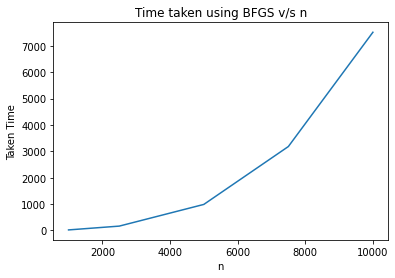

In [ ]:
plt.plot(list_n,Time_bfgs)
plt.title('Time taken using BFGS v/s n')
plt.ylabel('Taken Time')
plt.xlabel('n')
plt.show()

with increasing value of n i.e. number of variables, the time taken in minimizing the function also increases almost quadratically as it gives a quadratic polynomial type shape.